In [1]:
import pandas as pd
import re
from datetime import datetime

In [4]:
tweets = pd.read_csv('/content/dane4.csv')

In [5]:
print(tweets.head())

   coordinates                      created_at hashtags media urls  \
0          NaN  Mon Nov 28 16:30:02 +0000 2022      NaN   NaN  NaN   
1          NaN  Mon Nov 28 20:35:39 +0000 2022      NaN   NaN  NaN   
2          NaN  Mon Nov 28 16:41:28 +0000 2022      NaN   NaN  NaN   
3          NaN  Mon Nov 28 19:35:31 +0000 2022      NaN   NaN  NaN   
4          NaN  Mon Nov 28 13:24:52 +0000 2022      NaN   NaN  NaN   

   favorite_count                   id in_reply_to_screen_name  \
0               9  1597266579062149122            matipniewski   
1              35  1597328388636938241                     NaN   
2               0  1597269455020883968               mharger20   
3               0  1597313255554572289           MussaBabaleo2   
4               1  1597219976712433665                elonmusk   

   in_reply_to_status_id  in_reply_to_user_id  ... user_followers_count  \
0           1.597230e+18         1.401581e+18  ...                    2   
1                    NaN        

In [6]:
# 1.1 Zamień skróty nazw dni tygodnia na polskie odpowiedniki (pełne nazwy dni tygodnia) - kolumna created_at
def replace_weekday_names(date_str):
    days = {
        "Mon": "Poniedziałek", "Tue": "Wtorek", "Wed": "Środa",
        "Thu": "Czwartek", "Fri": "Piątek", "Sat": "Sobota", "Sun": "Niedziela"
    }
    for key, value in days.items():
        date_str = date_str.replace(key, value)
    return date_str

In [7]:
tweets['created_at'] = tweets['created_at'].apply(replace_weekday_names)

In [8]:
# 1.2 Zamień skróty nazw miesięcy na liczbowe odpowiedniki (np Jun na 06) - kolumna user_created_at
def replace_month_names(date_str):
    months = {
        "Jan": "01", "Feb": "02", "Mar": "03", "Apr": "04",
        "May": "05", "Jun": "06", "Jul": "07", "Aug": "08",
        "Sep": "09", "Oct": "10", "Nov": "11", "Dec": "12"
    }
    for key, value in months.items():
        date_str = date_str.replace(key, value)
    return date_str

In [9]:
tweets['user_created_at'] = tweets['user_created_at'].apply(replace_month_names)

In [10]:
tweets

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Poniedziałek Nov 28 16:30:02 +0000 2022,NaN,NaN,NaN,9,1597266579062149122,matipniewski,1.597230e+18,1.401581e+18,...,2,8,0,sraka,sraka,ko_smaty,244,NaN,http://sraka.com,False
1,NaN,Poniedziałek Nov 28 20:35:39 +0000 2022,NaN,NaN,NaN,35,1597328388636938241,NaN,NaN,NaN,...,8186,589,162,Polska,PrawyPopulista 🇵🇱🇺🇦,PrawaStronaa,80738,NaN,NaN,False
2,NaN,Poniedziałek Nov 28 16:41:28 +0000 2022,NaN,NaN,NaN,0,1597269455020883968,mharger20,1.597269e+18,8.360090e+17,...,102,622,0,NaN,Harger do 047,mharger20,5690,NaN,http://Twich.tv/mharger20,False
3,NaN,Poniedziałek Nov 28 19:35:31 +0000 2022,NaN,NaN,NaN,0,1597313255554572289,MussaBabaleo2,1.597312e+18,1.464325e+18,...,281,920,0,Tanzania,Waltz,WaMpembee,1242,NaN,NaN,False
4,NaN,Poniedziałek Nov 28 13:24:52 +0000 2022,NaN,NaN,NaN,1,1597219976712433665,elonmusk,1.597171e+18,4.419640e+07,...,34,239,0,NaN,Mark Damasco,realMarkDamasco,875,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,NaN,Niedziela Nov 20 22:00:01 +0000 2022,ElonMusk twitter,NaN,https://naekranie.pl/lekkie/twitter-kto-odszed...,1,1594450518553739264,NaN,NaN,NaN,...,10766,108,61,Poland,naEKRANIE.pl,naEKRANIEpl,34233,NaN,http://www.naEKRANIE.pl,False
696,NaN,Niedziela Nov 20 23:02:18 +0000 2022,NaN,NaN,NaN,0,1594466191631843328,dudinha_fritz,1.594457e+18,1.495552e+18,...,367,1146,0,NaN,livinho 🛸,livinhocrf77,9372,NaN,NaN,False
697,NaN,Niedziela Nov 20 16:14:44 +0000 2022,NaN,NaN,https://twitter.com/everything20233/status/159...,8,1594363622515408901,NaN,NaN,NaN,...,10233,31,122,"Bromley, London",Seb Ross 🇵🇱🇬🇧,SebRoss4,18616,NaN,NaN,False
698,NaN,Niedziela Nov 20 17:46:46 +0000 2022,NaN,NaN,https://www.cnn.com/2022/11/20/tech/twitter-el...,3,1594386785869893633,NaN,NaN,NaN,...,4475,2263,2,"Italia,Polonia,Svizzera,USA",Ally L.Beal,AllMcBill,27150,NaN,NaN,False


In [11]:
# 1.3 Pobierz wszystkie linki do tweetów i przekaż je do listy.
tweet_links = tweets['tweet_url'].dropna().tolist()

In [12]:
tweet_links

['https://twitter.com/ko_smaty/status/1597266579062149122',
 'https://twitter.com/PrawaStronaa/status/1597328388636938241',
 'https://twitter.com/mharger20/status/1597269455020883968',
 'https://twitter.com/WaMpembee/status/1597313255554572289',
 'https://twitter.com/realMarkDamasco/status/1597219976712433665',
 'https://twitter.com/CyberfeedP/status/1597296329838845952',
 'https://twitter.com/KRESYPL/status/1597349884230860802',
 'https://twitter.com/sbaiesu/status/1597318197937864705',
 'https://twitter.com/pjeroshki/status/1597193802942681088',
 'https://twitter.com/DragomirSonar/status/1597348081380470787',
 'https://twitter.com/MartaSierpinska/status/1597488637934858241',
 'https://twitter.com/camarada_diniz/status/1597320762075271168',
 'https://twitter.com/kosa64/status/1597477148557660161',
 'https://twitter.com/ZbigniewBarszc1/status/1597358397409853440',
 'https://twitter.com/CommonSensePL/status/1597315402542956544',
 'https://twitter.com/JakubNekio/status/159720165514533273

In [13]:
# 1.4 Pobierz wszystkie linki znajdujące się w tweetach i przekaż je do listy (kolumna urls)
urls = tweets['urls'].dropna().tolist()

In [14]:
urls

['https://cyberfeed.pl/elon-musk-sugeruje-ze-apple-nienawidzi-wolnosci-slowa-po-tym-jak-w-wiekszosci-przestal-reklamowac-sie-na-twitterze/',
 'https://kresy.pl/?p=853255',
 'https://www.pb.pl/musk-apple-w-wiekszosci-przestalo-reklamowac-sie-na-twitterze-1170669',
 'https://twitter.com/Casimiro/status/1597267714271498241',
 'https://buff.ly/3Vyvldn',
 'https://www.disclose.tv/id/1597347894134177792/',
 'https://twitter.com/CommonSensePL/status/1597315402542956544',
 'https://twitter.com/Astronomiaum/status/1597303683972501505',
 'http://bit.ly/3AV1B2n',
 'https://www.press.pl/tresc/73941,twitter-podzieli-subskrypcje-na-zlote_-niebieskie-i-szare_-musk-wprowadza-generalna-amnestie',
 'https://comparic.pl/apple-i-google-opodatkowaly-internet-elon-musk-i-twitter-chce-isc-na-wojne-z-gigantami/',
 'https://twitter.com/musicnewsfactpl/status/1597215827342000129',
 'https://twitter.com/ASnowdrops/status/1597295919636320256',
 'https://twitter.com/nextlevel_br/status/1597270951531794432',
 'http

In [15]:
# 1.5 Pobierz wszystkie linki do obrazków i przekaż je do listy (kolumna media).
media_links = tweets['media'].dropna().tolist()

In [16]:
media_links

['https://twitter.com/CommonSensePL/status/1597315402542956544/photo/1',
 'https://twitter.com/Andy27812/status/1597285949162999808/photo/1',
 'https://twitter.com/ktrelski/status/1597247324857638912/photo/1',
 'https://twitter.com/ARNOLD61102750/status/1597221567447957505/photo/1',
 'https://twitter.com/musicnewsfactpl/status/1597208558852255744/photo/1',
 'https://twitter.com/dawnmaskedindiv/status/1597307706343583744/photo/1',
 'https://twitter.com/KotPiotr2/status/1597189740570509315/photo/1',
 'https://twitter.com/LechuCzechuTV/status/1597309464696459265/photo/1',
 'https://twitter.com/Zyzbyszok/status/1597140076533719042/photo/1',
 'https://twitter.com/seiarrotar/status/1596613288192016384/photo/1',
 'https://twitter.com/Arek_ZdWola/status/1596610149820424193/photo/1',
 'https://twitter.com/MariuszZarycht1/status/1596911109948440576/photo/1',
 'https://twitter.com/ePressoNews/status/1597176925419495430/photo/1',
 'https://twitter.com/LuksemburgRadek/status/1596913985894617088/pho

In [53]:
# 1.6 Usuń wszystkie słowa oznaczone jako stopwords i przekaż oczyszczony tekst do nowej kolumny o nazwie text_without_stopwords
!python -m spacy download pl_core_news_sm
import spacy
import pandas as pd
nlp = spacy.load("pl_core_news_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 46.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [54]:
def remove_stopwords(text):
  doc = nlp(text)
  return " ".join([token.text for token in doc if not token.is_stop])

In [55]:
tweets['text_without_stopwords'] = tweets['text'].apply(remove_stopwords)

In [56]:
tweets['text_without_stopwords']

,text_without_stopwords
0,@matipniewski Wydaje Twitter miejsce rzucenie ...
1,"Apple grozi , usunie Twittera swojego sklepu ,..."
2,Mano nada elon musk kkkkkkkkkk
3,@MussaBabaleo2 kwani ndio elon musk
4,"@elonmusk What you mean ( wdym elon ? , Wdym m..."
...,...
695,Wkrótce przejęciu platformy # ElonMusk celebry...
696,@dudinha_fritz @elonmusk Elon Musk ?
697,"udostępniam , Twitter . Elon Musk należy Konfe..."
698,E . Musk pogrążyć Twittera większym chaosie pr...


In [100]:
import pandas as pd
tweets

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,weekday
0,NaN,2022-11-28 16:30:02+00:00,NaN,NaN,NaN,9,1597266579062149122,matipniewski,1.597230e+18,1.401581e+18,...,8,0,sraka,sraka,ko_smaty,244,NaN,http://sraka.com,False,Monday
1,NaN,2022-11-28 20:35:39+00:00,NaN,NaN,NaN,35,1597328388636938241,NaN,NaN,NaN,...,589,162,Polska,PrawyPopulista 🇵🇱🇺🇦,PrawaStronaa,80738,NaN,NaN,False,Monday
2,NaN,2022-11-28 16:41:28+00:00,NaN,NaN,NaN,0,1597269455020883968,mharger20,1.597269e+18,8.360090e+17,...,622,0,NaN,Harger do 047,mharger20,5690,NaN,http://Twich.tv/mharger20,False,Monday
3,NaN,2022-11-28 19:35:31+00:00,NaN,NaN,NaN,0,1597313255554572289,MussaBabaleo2,1.597312e+18,1.464325e+18,...,920,0,Tanzania,Waltz,WaMpembee,1242,NaN,NaN,False,Monday
4,NaN,2022-11-28 13:24:52+00:00,NaN,NaN,NaN,1,1597219976712433665,elonmusk,1.597171e+18,4.419640e+07,...,239,0,NaN,Mark Damasco,realMarkDamasco,875,NaN,NaN,False,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,NaN,2022-11-20 22:00:01+00:00,ElonMusk twitter,NaN,https://naekranie.pl/lekkie/twitter-kto-odszed...,1,1594450518553739264,NaN,NaN,NaN,...,108,61,Poland,naEKRANIE.pl,naEKRANIEpl,34233,NaN,http://www.naEKRANIE.pl,False,Sunday
696,NaN,2022-11-20 23:02:18+00:00,NaN,NaN,NaN,0,1594466191631843328,dudinha_fritz,1.594457e+18,1.495552e+18,...,1146,0,NaN,livinho 🛸,livinhocrf77,9372,NaN,NaN,False,Sunday
697,NaN,2022-11-20 16:14:44+00:00,NaN,NaN,https://twitter.com/everything20233/status/159...,8,1594363622515408901,NaN,NaN,NaN,...,31,122,"Bromley, London",Seb Ross 🇵🇱🇬🇧,SebRoss4,18616,NaN,NaN,False,Sunday
698,NaN,2022-11-20 17:46:46+00:00,NaN,NaN,https://www.cnn.com/2022/11/20/tech/twitter-el...,3,1594386785869893633,NaN,NaN,NaN,...,2263,2,"Italia,Polonia,Svizzera,USA",Ally L.Beal,AllMcBill,27150,NaN,NaN,False,Sunday


In [101]:
# 2.1 Wypisz top5 tweetów z największa liczbą polubień.
top5_likes = tweets.sort_values(by='favorite_count', ascending=False).head(5)
print("Top 5 tweetów z największą liczbą polubień:")
print(top5_likes[['text', 'favorite_count']])

Top 5 tweetów z największą liczbą polubień:
                                                  text  favorite_count
648  ...Elon Musk zmienił przycisk Twitter Like z ❤...            7680
57   Elon Musk pracuje nad zwiększeniem limitu znak...            1442
309  Elon Musk nie przywróci konta Alexa Jonesa (fo...             961
294  Podobno Elon Musk eliminuje wszystkie pedofils...             440
457  Elon Musk w szafie w siedzibie twittera znalaz...             182


In [102]:
# 2.2 Wypisz top5 tweetów z największa liczbą retweetów.
top5_retweets = tweets.sort_values(by='retweet_count', ascending=False).head(5)
print("\nTop 5 tweetów z największą liczbą retweetów:")
print(top5_retweets[['text', 'retweet_count']])


Top 5 tweetów z największą liczbą retweetów:
                                                  text  retweet_count
309  Elon Musk nie przywróci konta Alexa Jonesa (fo...             38
55   "Dokumenty Twittera dotyczące tłumienia wolnoś...             32
57   Elon Musk pracuje nad zwiększeniem limitu znak...             30
236  👏 Elon Musk rozpędził na cztery wiatry europej...             27
47   "Opinia publiczna zasługuje na to żeby wiedzie...             27


In [103]:
# 2.3 Wyświetl tylko te tweety, które nie są uznane jako “wrażliwe” (kolumna possibly_sensitive).
not_sensitive_tweets = tweets[tweets['possibly_sensitive'] == False]
print("\nTweety, które nie są uznane jako wrażliwe:")
print(not_sensitive_tweets[['text', 'possibly_sensitive']])


Tweety, które nie są uznane jako wrażliwe:
                                                  text possibly_sensitive
5    Elon Musk sugeruje, że Apple nienawidzi wolnoś...              False
6    Elon Musk oskarżył firmę Apple o grożenie zabl...              False
14   Elon Musk vs Apple!\n\nJak obstawiacie? Komu k...              False
17   Elon Musk przekazał, że Apple ograniczyło swoj...              False
19      PAU NO CU DO ELON MUSK https://t.co/MUpIHeQxiz              False
..                                                 ...                ...
693  Elon Musk może zostać pozbawiony obywatelstwa ...              False
695  Wkrótce po przejęciu platformy przez #ElonMusk...              False
697  To nie ja udostępniam, tylko Twitter. Elon Mus...              False
698  E. Musk może pogrążyć Twittera w jeszcze więks...              False
699      Elon Musk widział to. https://t.co/AM16jz7dwS              False

[326 rows x 2 columns]


In [104]:
# 2.4 Wyświetl tweety użytkownika, który założył konto najwcześniej (spośród wszystkich użytkowników w datasecie) (kolumna user_created_at).
tweets['user_created_at'] = pd.to_datetime(tweets['user_created_at'], errors='coerce')
earliest_user = tweets.loc[tweets['user_created_at'].idxmin()]  # Najwcześniejsza data założenia konta
earliest_user_tweets = tweets[tweets['user_id'] == earliest_user['user_id']]
print("\nTweety użytkownika, który założył konto najwcześniej:")
print(earliest_user_tweets[['text', 'user_created_at']])


Tweety użytkownika, który założył konto najwcześniej:
                                                  text  \
255  Ciekawy tekst o tym co Unia Europejska zrobi, ...   

              user_created_at  
255 2007-03-23 11:53:55+00:00  


<ipython-input-104-2c51279b6055>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tweets['user_created_at'] = pd.to_datetime(tweets['user_created_at'], errors='coerce')


In [105]:
# 2.5 Wyświetl tweety użytkownika. który ma najwięcej followersów.
most_followers_user = tweets.loc[tweets['user_followers_count'].idxmax()]
most_followers_tweets = tweets[tweets['user_id'] == most_followers_user['user_id']]
print(most_followers_tweets[['text', 'user_followers_count']])

                                                  text  user_followers_count
261  Miliarder Elon Musk zadeklarował w piątek, kog...               1912915
506  Elon Musk wykluczył powrót Alexa Jonesa na Twi...               1912915


In [106]:
# 2.6 Wyświetl tylko zweryfikowanych użytkowników (kolumna user_verified)
verified_users_tweets = tweets[tweets['user_verified'] == True]
print(verified_users_tweets[['text', 'user_verified']])

                                                  text  user_verified
17   Elon Musk przekazał, że Apple ograniczyło swoj...           True
49   To, co dzisiaj wyprawia na Twitterze Elon Musk...           True
50   Elon Musk udostępnił na Twitterze grafikę, któ...           True
75   Elon Musk wściekł się, że Apple właściwie wstr...           True
131  @bo0nkers Bo Elon Musk woli hakować konto TVP ...           True
137  Od czasu, kiedy Elon Musk przejął Twittera, uż...           True
140  Jeżeli Apple zdecyduje się usunąć Twittera z A...           True
209  Elon Musk zaczyna mieszać się w krajową polity...           True
211  Miliarder mówi, że woli „kogoś rozsądnego i ce...           True
250  Wybory prezydenckie w USA. Elon Musk poprze re...           True
255  Ciekawy tekst o tym co Unia Europejska zrobi, ...           True
261  Miliarder Elon Musk zadeklarował w piątek, kog...           True
273  Elon Musk ogłasza "wielką amnestię" na Twitter...           True
299  Elon Musk zatru

In [108]:
# 2.7 Podaj, w który dzień tygodnia najczęściej były publikowane tweety z datasetu
tweets['created_at'] = pd.to_datetime(tweets['created_at'], errors='coerce')
tweets['weekday'] = tweets['created_at'].dt.day_name()
most_common_weekday = tweets['weekday'].value_counts().idxmax()
print(most_common_weekday)

Monday


In [65]:
def extract_persons(text):
  doc = nlp(text)
  return [ent.text for ent in doc.ents if ent.label_ == "persName"]

In [66]:
tweets['persons'] = tweets['text'].apply(extract_persons)

In [67]:
print(tweets['persons'])

0                         [Twitter]
1             [Twittera, Elon Musk]
2                                []
3                                []
4                                []
                   ...             
695                              []
696                     [Elon Musk]
697                 [Twitter, Musk]
698    [E., Musk, Twittera, Trumpa]
699                     [Elon Musk]
Name: persons, Length: 700, dtype: object


In [68]:
# 3.2 Rozpoznaj miejsca (placeName) i przekaż je do kolumny o nazwie places
def extract_places(text):
    if pd.isna(text):
        return []
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == "placeName"]

In [69]:
tweets['places'] = tweets['text'].apply(extract_places)

In [70]:
print(tweets['places'])

0                  []
1                  []
2                  []
3                  []
4                  []
            ...      
695                []
696                []
697    [Konfederacji]
698                []
699                []
Name: places, Length: 700, dtype: object


In [71]:
# 3.3 Rozpoznaj organizacje (orgName) i przekaż je do kolumny o nazwie organizations
def extract_organizations(text):
    if pd.isna(text):
        return []
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == "orgName"]

In [72]:
tweets['organizations'] = tweets['text'].apply(extract_organizations)

In [74]:
print(tweets['organizations'])

0              []
1         [Apple]
2              []
3              []
4              []
          ...    
695    [ElonMusk]
696            []
697            []
698            []
699            []
Name: organizations, Length: 700, dtype: object


In [79]:
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
tweets = pd.read_csv('/content/dane4.csv')

In [82]:
# 4 wykonaj wykres ilustrujący liczbę tweetów per dzień tygodnia
tweets['created_at'] = pd.to_datetime(tweets['created_at'])
tweets['weekday'] = tweets['created_at'].dt.day_name()
weekday_counts = tweets['weekday'].value_counts()

<ipython-input-82-4fa5d95c4008>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tweets['created_at'] = pd.to_datetime(tweets['created_at'])


In [83]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = weekday_counts.reindex(order)

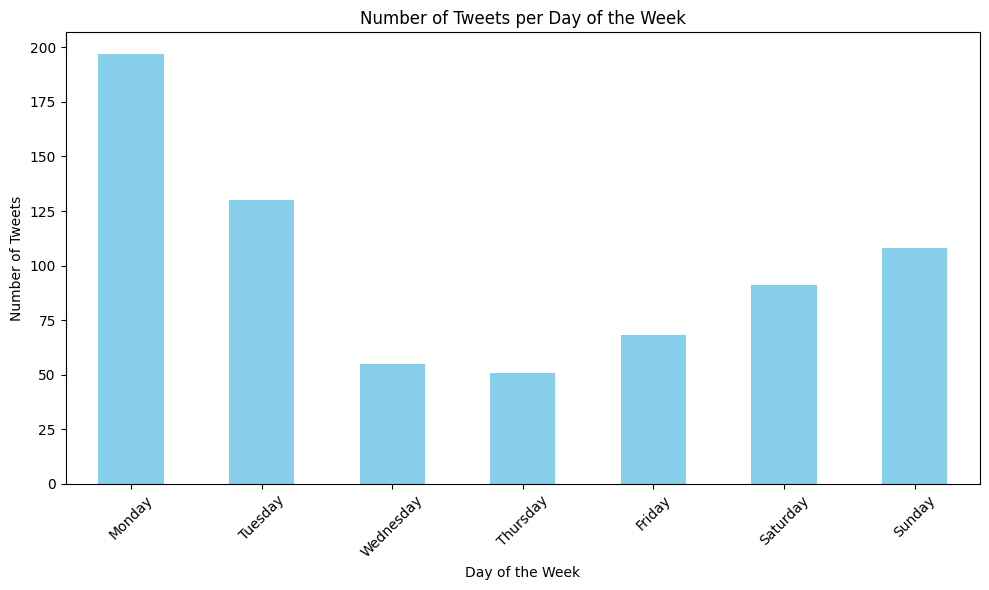

In [99]:
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='bar', color='skyblue')

plt.title('Number of Tweets per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()